In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


<h1 style="color:red;"> I- DATA UNDERSTUNDING</h1>

In [2]:
### Import Data
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data  = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
print("train_data shape" , train_data.shape)
print("test_data shape" , test_data.shape)

train_data shape (1460, 81)
test_data shape (1459, 80)


In [4]:
train_data['train_set'] = 1
test_data['train_set'] = 0
data = pd.concat([train_data , test_data] , axis = 0 )

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_set
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [6]:
print("Data Shape : train data + test data is " , data.shape)

Data Shape : train data + test data is  (2919, 82)


# <h3 style="color:blue;"> Conclusion </h3>
We have concatenated train and test data in order to have more informations . 

# <h1 style="color:red;"> II- DATA PREPROCESSING </h1>

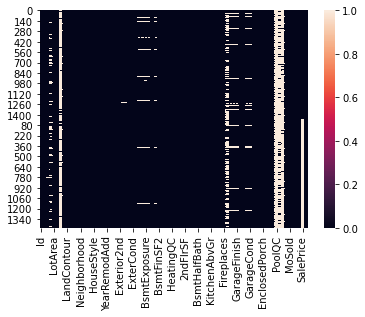

In [7]:
sns.heatmap(data.isna())

In [8]:
# Check the missing values
def Missing_values(df):
    list_missing_values = []
    for col in data:
        percentage = (df[col].isna().sum()/ df.shape[0])*100
        list_missing_values.append((col , percentage))
    Missing_values = pd.DataFrame(list_missing_values , columns = ['Name' , 'Percentage %'])
    return Missing_values

In [9]:
MISS_VAL = Missing_values(data)
MISS_VAL[MISS_VAL['Percentage %'] > 70 ]

,Name,Percentage %
6,Alley,93.216855
72,PoolQC,99.657417
73,Fence,80.438506
74,MiscFeature,96.402878


In [10]:
# Drop all columns have more than 70 % of missing values .
data_edit = data.drop(['Id' ,'Alley' , 'PoolQC' , 'Fence' , 'MiscFeature' ] , axis = 1)

# <h3 style="color:blue;"> Conclusion </h3>
Checking missing data is one of the important tasks in a model of ML : <br></br>
We have deleted all features with % of missing values > 70% ( depending on the model ) 

# <h1 style="color:red;"> III - EXPLORATORY DATA ANALYTICS </h1>

In [11]:
data_edit.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_set
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000.0,1


In [12]:
print(data_edit.shape)

(2919, 77)


object     43
int64      27
float64    12
dtype: int64


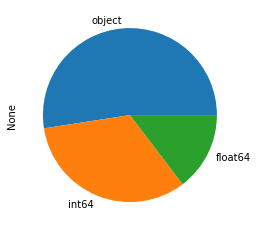

In [13]:
# % of value types 
print(data.dtypes.value_counts())
data.dtypes.value_counts().plot.pie()

# <h2 style="color:green;"> 1 - Categorical Features </h2>

In [14]:
def Get_Categorical_features(df):
    for col in data.select_dtypes('object'):
        print(f'{col :-<10} {data[col].unique()}')


In [15]:
# Here we can get the unique values of each column
Get_Categorical_features(data_edit)

MSZoning-- ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street---- ['Pave' 'Grvl']
Alley----- [nan 'Grvl' 'Pave']
LotShape-- ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities- ['AllPub' 'NoSeWa' nan]
LotConfig- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope- ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType-- ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle- ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl-- ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ext

In [16]:
data_categorical = data_edit.select_dtypes('object')

In [17]:
print("Shape of Categorical data is :",data_categorical.shape )
data_categorical.head()

Shape of Categorical data is : (2919, 39)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


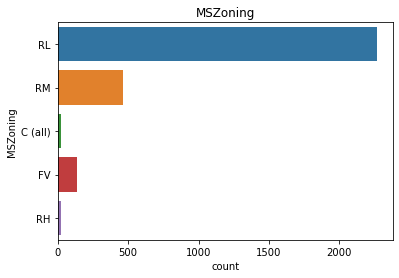

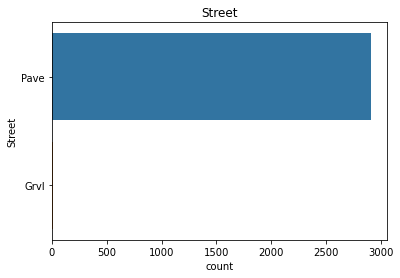

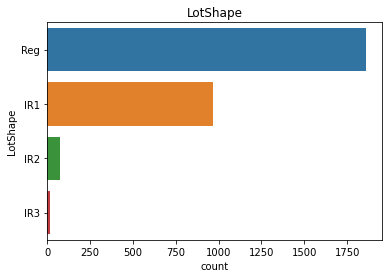

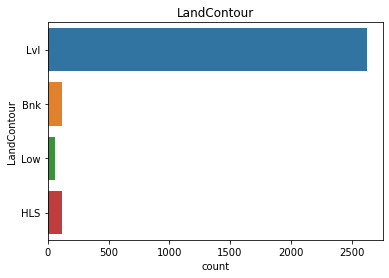

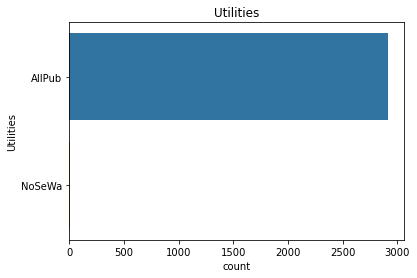

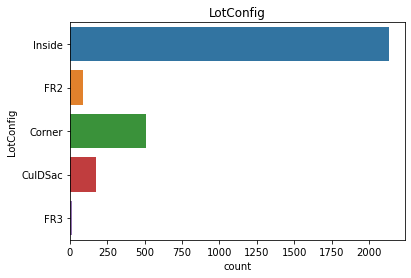

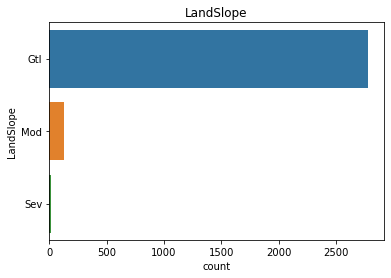

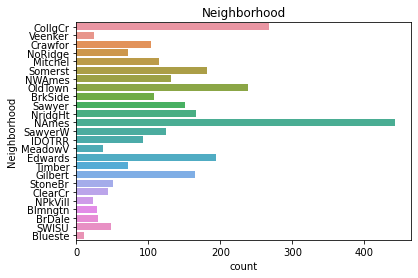

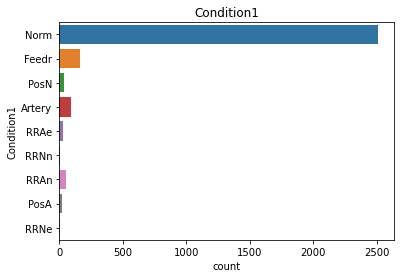

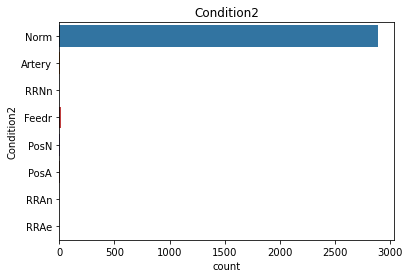

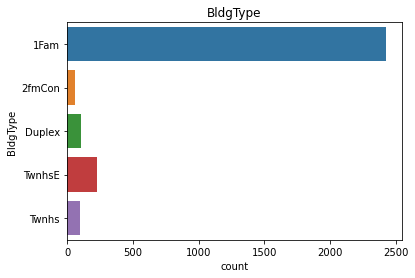

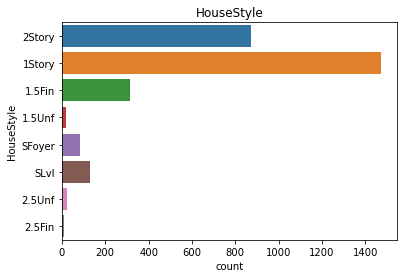

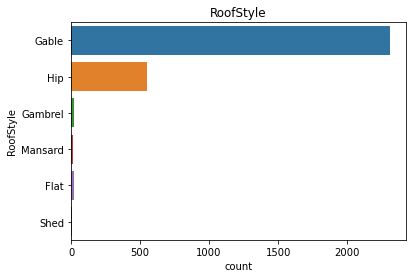

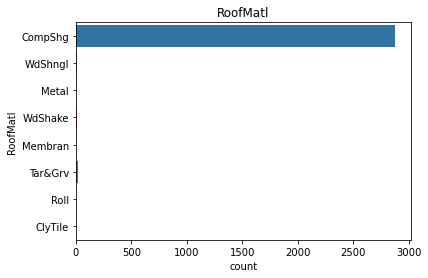

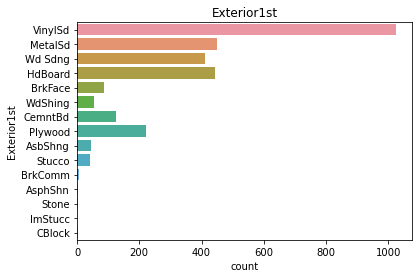

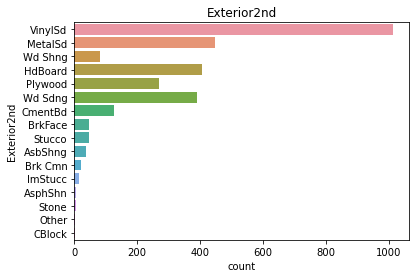

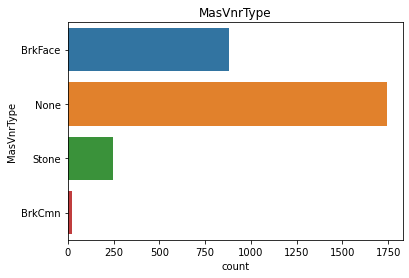

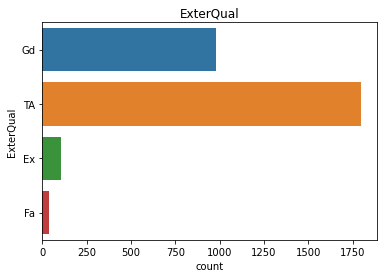

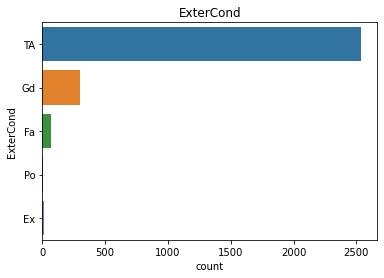

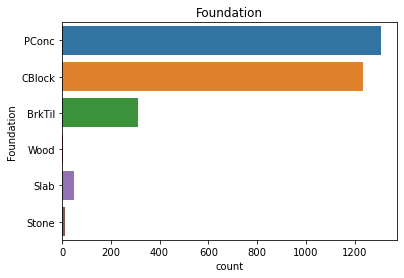

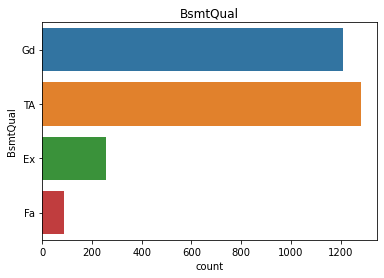

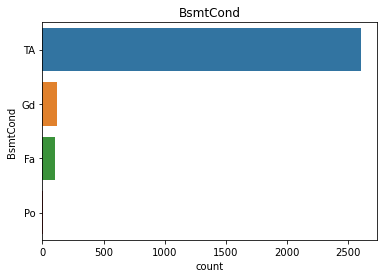

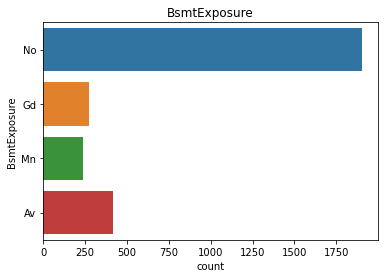

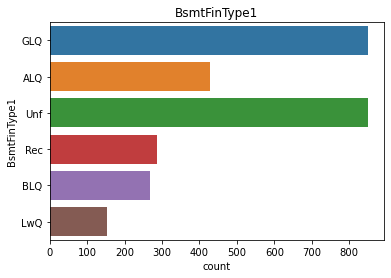

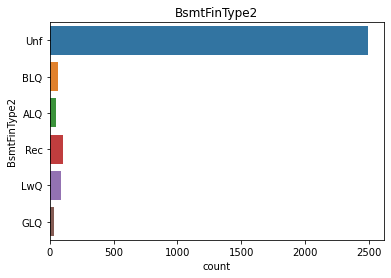

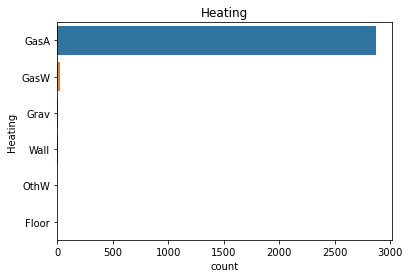

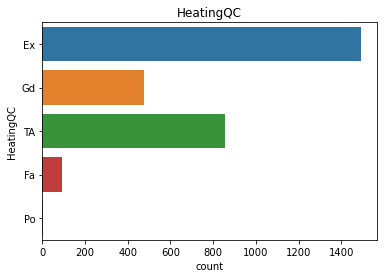

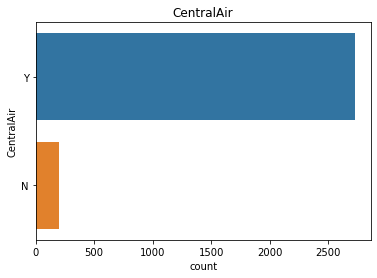

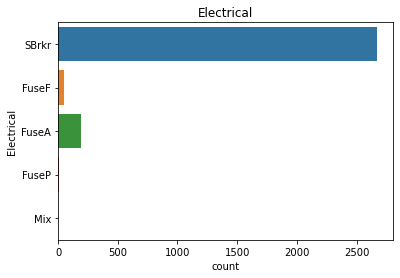

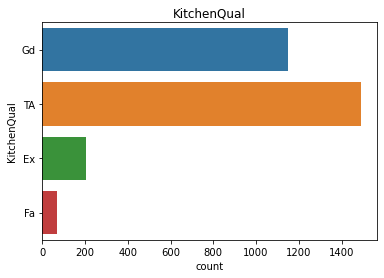

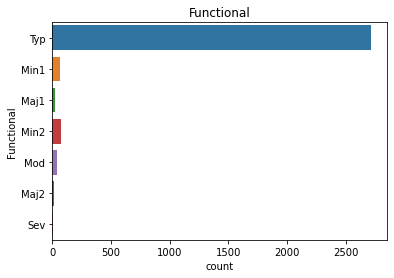

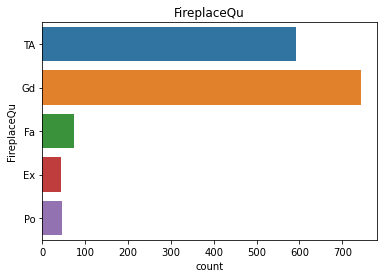

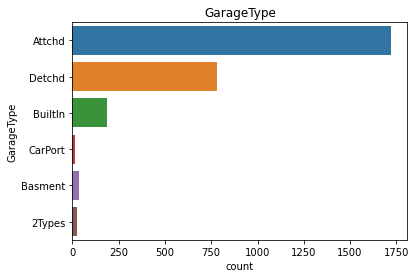

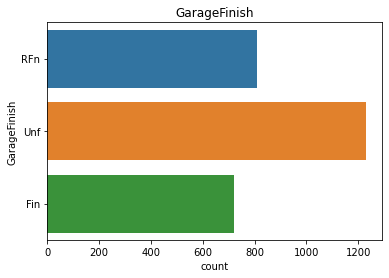

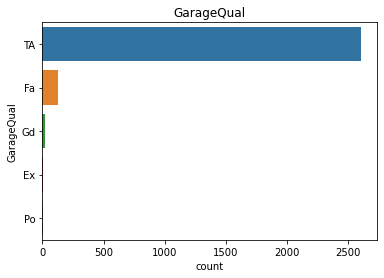

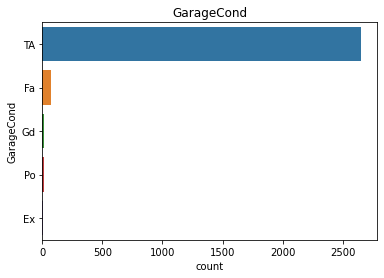

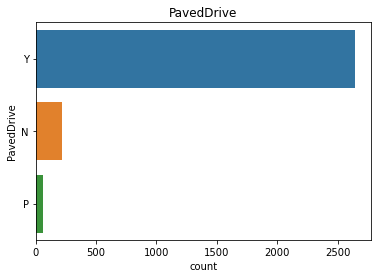

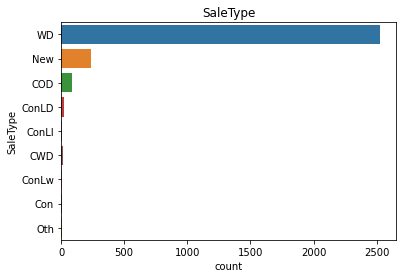

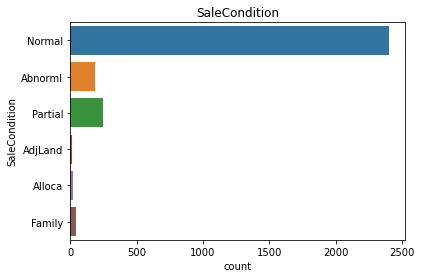

In [18]:
for col in data_categorical:
    plt.figure()
    sns.countplot(y = col , data = data_categorical)
    plt.title(col)
    

<h5>With Count Plots , we can have an idea how we can fill miss values . </h5>

In [19]:
data_categorical.isna().sum()

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64

In [20]:
def Fill_missing_values(data):
    for col in data:
        data[col] = data[col].fillna(data[col].mode()[0])
                                     
    
            

In [21]:
Fill_missing_values(data_categorical)
data_categorical.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# <h2 style="color:green;"> 2 - Numerical Features </h2>

In [22]:
data_numerical = data.select_dtypes(exclude=['object'])
data_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train_set
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,61,0,0,0,0,0,2,2008,208500.0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,0,0,5,2007,181500.0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,42,0,0,0,0,0,9,2008,223500.0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,35,272,0,0,0,0,2,2006,140000.0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,84,0,0,0,0,0,12,2008,250000.0,1


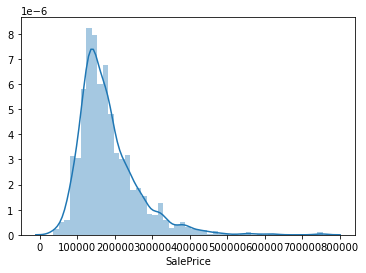

In [23]:
# Target variable :
sns.distplot(data_numerical['SalePrice'])

In [24]:
data_numerical.isna().sum()

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train_set           0
dtype: int64

In [25]:
data_numerical['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [26]:
# We fill values of LotFrontage with 68
data_numerical['LotFrontage'] = data_numerical['LotFrontage'].fillna(68)

In [27]:
# We fill values of GarageYrBlt using this way :
diff = (data_numerical['YrSold'] - data_numerical['YearBuilt']).median()
data_numerical['GarageYrBlt'] = data_numerical['GarageYrBlt'].fillna(data_numerical['YrSold'] - diff)

In [28]:
for col in data_numerical:
    data_numerical[col] = data_numerical[col].fillna(data_numerical[col].mode()[0])

In [29]:
data_numerical.loc[: , ['YearBuilt'  , 'YearRemodAdd' , 'YrSold' ]]
data_numerical['House_Age'] = data_numerical['YrSold'] - data_numerical['YearBuilt']
data_numerical['Remod_First_Age'] = data_numerical['YearRemodAdd'] - data_numerical['YearBuilt']

In [30]:
def State_Feature(Remod_First_Age) : 
    if (Remod_First_Age < 10):
        return 3
    elif (Remod_First_Age >= 10) & (Remod_First_Age < 30):
        return 2
    elif (Remod_First_Age >= 30) & (Remod_First_Age < 100):
        return 1
    else:
        return 0


In [31]:
data_numerical['State'] = data_numerical['Remod_First_Age'].apply(lambda x : State_Feature(x))

In [32]:
data_numerical[data_numerical['House_Age'] < 0] 
print(data_numerical[data_numerical['House_Age'] < 0]['YrSold'])
print(data_numerical[data_numerical['House_Age'] < 0]['YearBuilt'])

1089    2007
Name: YrSold, dtype: int64
1089    2008
Name: YearBuilt, dtype: int64


In [33]:
data_numerical.loc[data_numerical['House_Age'] < 0, ['YrSold']] = 2008

<h3>Encoding : </h3>

In [34]:
data_categorica_encoding = pd.get_dummies(data_categorical , drop_first= True)

In [35]:
data_final = pd.concat([data_categorica_encoding , data_numerical] , axis = 1 , sort = False)

In [36]:
# divide the data_final to train and test data :
train_data_final = data_final[data_final['train_set'] == 1]
test_data_final = data_final[data_final['train_set'] == 0]

<h3 style="color:blue;"> Conclusion </h3>
- Enconding with dummies variables <br></br> 
- Separating data into train and test to begin our modelisation


# <h1 style="color:red;"> IV - MODELISATION </h1>

In [37]:
train_data_final.head()
y = train_data_final['SalePrice']
train_data_final.drop(['SalePrice' , 'train_set'] , axis = 1 , inplace = True)
test_data_final.drop(['SalePrice' , 'train_set'] , axis = 1 , inplace = True)


In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split , RandomizedSearchCV 

In [39]:
model = xgb.XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [40]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1 ,1.25]
max_depth = [2, 3 , 5 ,7 , 9 , 11 ,15]
n_estimators = [100, 500, 800, 1200, 1500]
learning_rate=[0.05,0.1,0.15,0.20 , 0.25 , 0.30]
min_child_weight=[1,2,3,4,5]

params_grid = {
    'booster' : booster ,
    'base_score' : base_score , 
    'max_depth' : max_depth , 
    'n_estimators' : n_estimators ,
    'learning_rate' : learning_rate , 
    'min_child_weight' : min_child_weight
}


In [41]:
RSCV_model = RandomizedSearchCV(
            estimator=model,
            param_distributions=params_grid,
            cv=5, n_iter=60,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42 )

In [42]:
X_train , X_test , y_train , y_test = train_test_split(train_data_final.values , y.values , test_size = 0.3 ,
                                                       random_state = 42)

In [43]:
RSCV_model.fit(X_train , y_train )

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 10.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          verbosity=None),
                   n_iter=60, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1,
                

In [44]:
RSCV_model.best_estimator_

XGBRegressor(base_score=1.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
XGB_Regressor = RSCV_model.best_estimator_
XGB_Regressor.fit(X_train , y_train)

XGBRegressor(base_score=1.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
test_data_final

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,House_Age,Remod_First_Age,State
0,0,1,0,0,1,0,0,1,0,0,...,0,0,120,0,0,6,2010,49,0,3
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,12500,6,2010,52,0,3
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,3,2010,13,1,3
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,6,2010,12,0,3
4,0,0,1,0,1,0,0,0,1,0,...,0,0,144,0,0,1,2010,18,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,6,2006,36,0,3
1455,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,4,2006,36,0,3
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,9,2006,46,36,1
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,700,7,2006,14,0,3


In [47]:
y_pred = XGB_Regressor.predict(test_data_final.values)

In [48]:
Submission = pd.DataFrame(
{
    "ID" : test_data_final['Id'] ,
    'SalePrice' : y_pred
})

In [49]:
Submission.to_csv('Submission.csv' , index = False)